# 这个文件主要说明我得出了与 P46图3.6 相反的结果
<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:30%;" />
alpha beta 方向都展示

## 我的结果 使用图片2048
$\lambda$ range: -0.1,0.25,25 

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/DN_large_lambda_range_2048.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

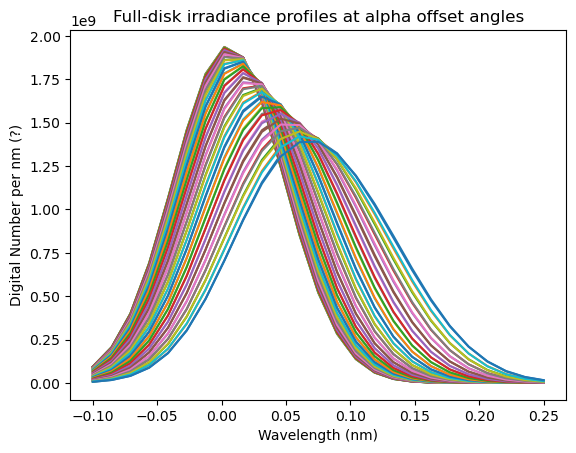

In [166]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Full-disk irradiance profiles at alpha offset angles')

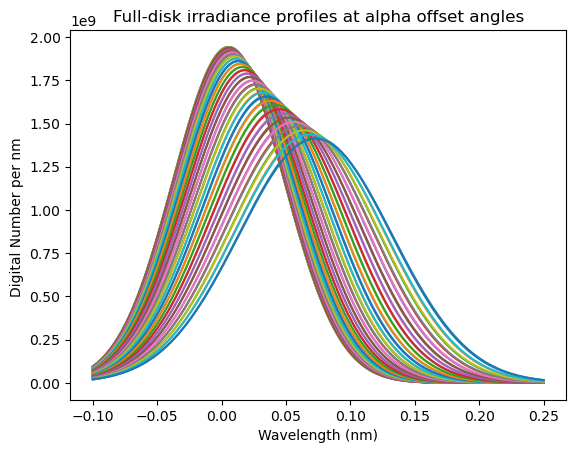

In [167]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list), label='linear')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")



Text(0.5, 1.0, 'Unpanned simulation')

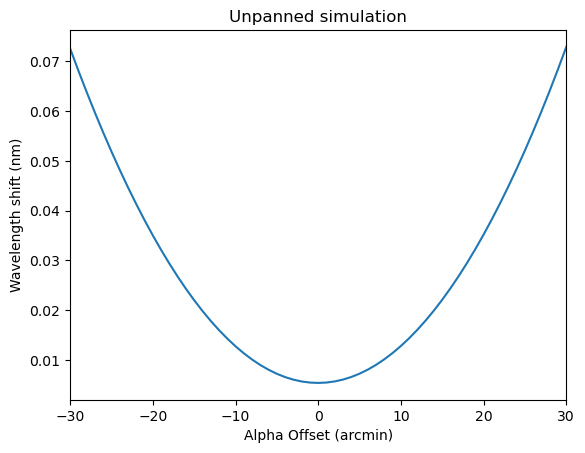

In [168]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

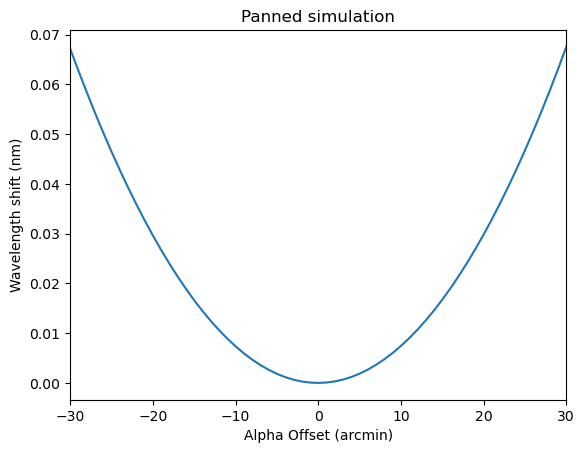

In [169]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [170]:
wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)]

array([6.71449916e-02, 6.26944443e-02, 5.83997358e-02, 5.42605860e-02,
       5.02766885e-02, 4.64477239e-02, 4.27733566e-02, 3.92532338e-02,
       3.58869867e-02, 3.26742322e-02, 2.96145754e-02, 2.67076128e-02,
       2.39529328e-02, 2.13501298e-02, 1.88987924e-02, 1.65985173e-02,
       1.44489099e-02, 1.24495880e-02, 1.06001853e-02, 8.90035415e-03,
       7.34976846e-03, 5.94812548e-03, 4.69514946e-03, 3.59059195e-03,
       2.63423417e-03, 1.82588801e-03, 1.16539705e-03, 6.52637229e-04,
       2.87517440e-04, 6.99798320e-05, 0.00000000e+00, 7.75870155e-05,
       3.02783331e-04, 6.75664558e-04, 1.19633911e-03, 1.86494773e-03,
       2.68166281e-03, 3.64668761e-03, 4.76025523e-03, 6.02262731e-03,
       7.43409265e-03, 8.99496544e-03, 1.07055829e-02, 1.25663033e-02,
       1.45775028e-02, 1.67395732e-02, 1.90529181e-02, 2.15179498e-02,
       2.41350877e-02, 2.69047458e-02, 2.98273432e-02, 3.29032903e-02,
       3.61329884e-02, 3.95168261e-02, 4.30551769e-02, 4.67483970e-02,
      

(-30.0, 30.0)

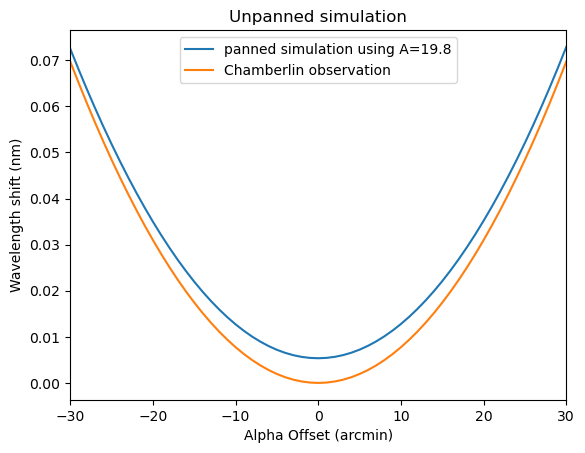

In [171]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

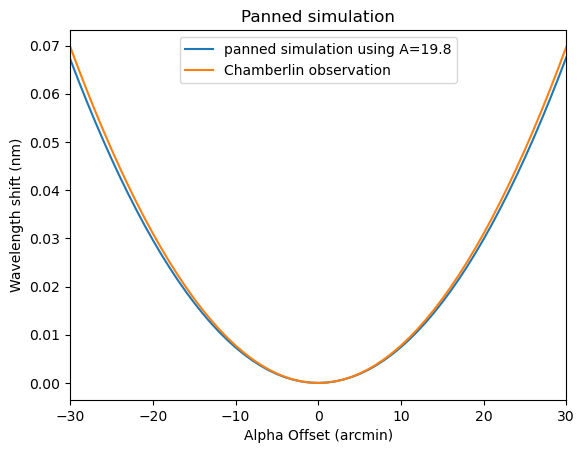

In [172]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

## 我的结果 使用图片4096

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_4096/DN__4096.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN??.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)

Text(0, 0.5, 'Digital Number per nm (?)')

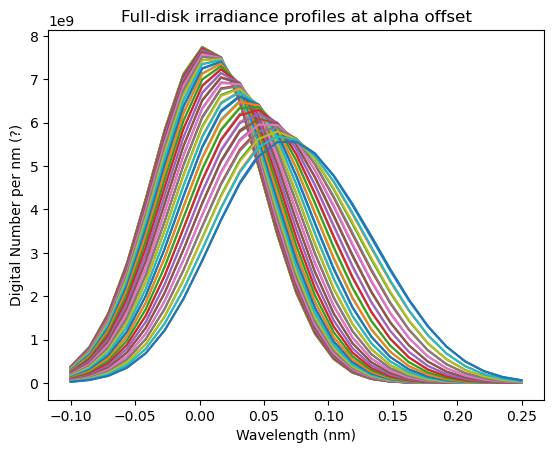

In [174]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset")
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")

Text(0.5, 1.0, 'Fitted full-disk irradiance profiles at alpha offset')

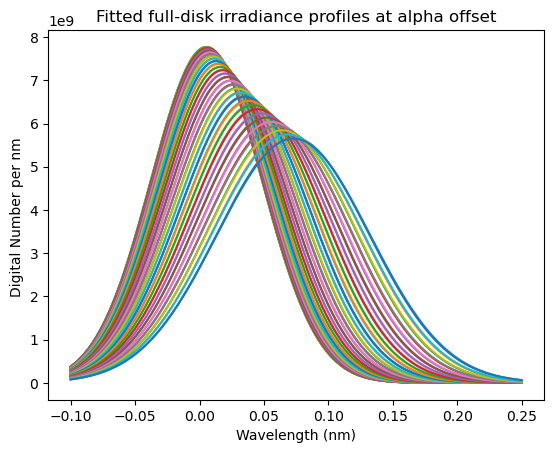

In [175]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list), label='linear')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Fitted full-disk irradiance profiles at alpha offset")

(-30.0, 30.0)

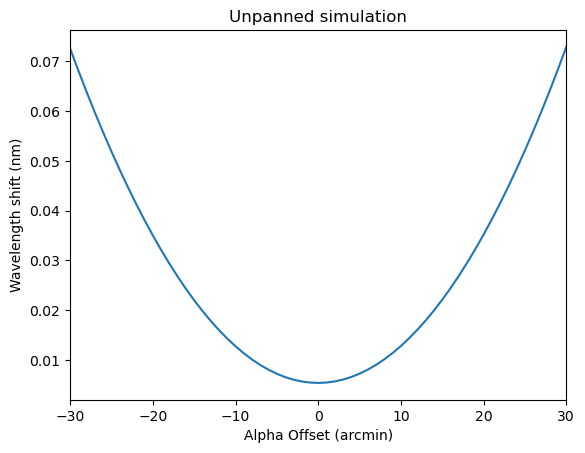

In [176]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

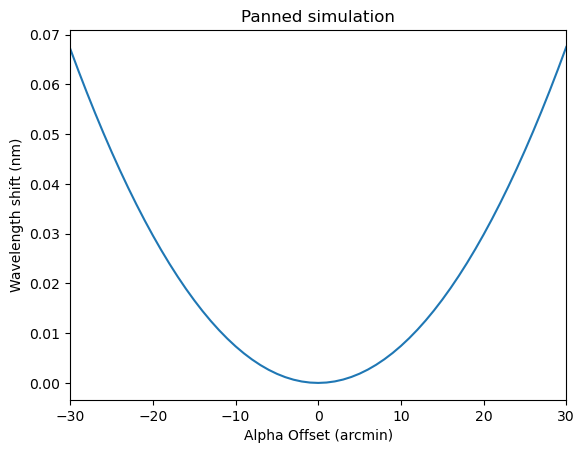

In [177]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
# 我采用直接向下平移

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

### 2048和4096 区别很小

这是上方2048的图片

<img src="./visualization.assets/image-20230312154027491.png" alt="image-20230312154027491" style="zoom:50%;" />

In [178]:
# 这是4096
wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)]

array([6.71446497e-02, 6.26940976e-02, 5.83993925e-02, 5.42602548e-02,
       5.02763663e-02, 4.64474030e-02, 4.27730511e-02, 3.92529384e-02,
       3.58866986e-02, 3.26739536e-02, 2.96143080e-02, 2.67073562e-02,
       2.39526897e-02, 2.13498996e-02, 1.88985763e-02, 1.65983132e-02,
       1.44487198e-02, 1.24494116e-02, 1.06000227e-02, 8.90020577e-03,
       7.34963421e-03, 5.94800568e-03, 4.69504400e-03, 3.59050061e-03,
       2.63415688e-03, 1.82582456e-03, 1.16534711e-03, 6.52600460e-04,
       2.87493416e-04, 6.99680818e-05, 0.00000000e+00, 7.75981969e-05,
       3.02805083e-04, 6.75696232e-04, 1.19638003e-03, 1.86499718e-03,
       2.68172006e-03, 3.64675193e-03, 4.76032592e-03, 6.02270355e-03,
       7.43417375e-03, 8.99505055e-03, 1.07056713e-02, 1.25663943e-02,
       1.45775959e-02, 1.67396671e-02, 1.90530132e-02, 2.15180440e-02,
       2.41351784e-02, 2.69048378e-02, 2.98274314e-02, 3.29033761e-02,
       3.61330717e-02, 3.95169079e-02, 4.30552541e-02, 4.67484636e-02,
      

(-30.0, 30.0)

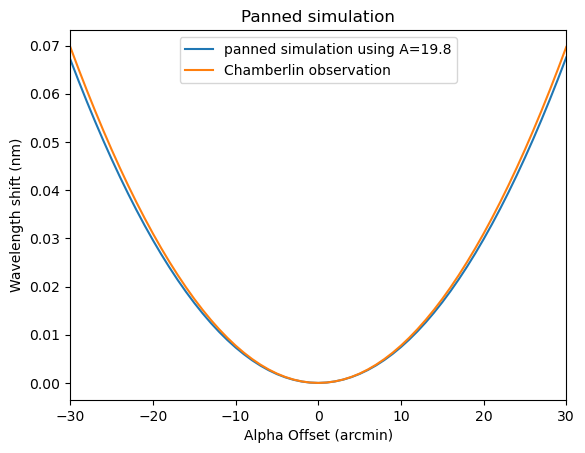

In [179]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_title("Panned simulation")
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_xlim(-30,30)

## 论文中的结果  对比

我的结果上图与下图博士论文P46结果明显不同：

上图：我的蓝线模拟在橙线下方

下图：红色模拟在观测黑虚线上方

P46 图 3.6 He II 中心波长随入射偏角𝜶和𝜷变化的模拟结果和观测结果

<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:70%;" />



论文P50对于“为什么A越迭代越大”的解释:

<img src="./visualization.assets/image-20230311155201746.png" alt="image-20230311155201746" style="zoom:33%;" />

而对于论文P50，对于“为什么A越迭代越大”的解释，我有不同的想法：

1. $\Delta \lambda_0 < \bar{\Delta \lambda}$ 的分析正确

2. 所以未向下平移的蓝线在橙色线上方

    <img src="./visualization.assets/image-20230312154237323.png" alt="image-20230312154237323" style="zoom:50%;" />

3. 但是我不理解为什么上述理论说明将蓝色线向下平移后（P46上半页是指的是平移吧？）蓝色线仍应该在橙线上方。

   而我的结果就在下方了。。

    <img src="./visualization.assets/image-20230312154314802.png" alt="image-20230312154314802" style="zoom:50%;" />